In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [72]:
path = os.getcwd() + '/data/participant.csv'
p_data = pd.read_csv(path)
p_data.apply(pd.to_numeric, errors='ignore')
p_data = p_data.drop(["collection_id", "email"], axis=1)
p_data.head(10)


,id,city,DOB,address,longitude,sex,state,latitude,name
0,102,Phoenix,1995-04-08T22:11:38Z,910 GRANADA ST #6,-112,M,Arizona,33,"WAHLERT,YIN FONG A"
1,1010,Santa Barbara,1993-03-08T22:11:38Z,4595 RIDING CLUB COURT,-120,M,California,34,"VILLA,TIA A"
2,1011,Santa Barbara,1994-07-08T22:11:38Z,1208 HENDERSON AVE,-120,F,California,34,"BLANDAL,NOEMY"
3,1012,Goleta,1998-10-08T22:11:38Z,3903 WARING RD,-120,M,California,34,"SPORES,MANDY MIN QIU"
4,1014,Buellton,1995-10-08T22:11:38Z,NaN,-120,M,California,35,"MOORE RISINGER,AUSENCIO M"
5,1017,Lompoc,1992-11-08T22:11:38Z,2208 COLD STREAM CT,-120,F,California,35,"KRUKOWSKI,LATOYYA MAE"
6,10125,Quinault,1995-02-08T22:11:38Z,"4891 INDEPENDENCE STREET, SUITE 120",-124,F,Washington,47,"MASHORDA,AZELROSE D"
7,10127,Taholah,1999-07-08T22:11:38Z,1000 CLAUDIA CT APT #5,-124,F,Washington,47,"WESTERBECK,ARNYGRACE N"
8,10128,Westport,1996-06-08T22:11:38Z,400 N. CONEJO AVE,-124,M,Washington,47,"JORGENSEN-MONTGOMERY,YOUNGER C"
9,10130,Coupeville,1994-12-08T22:11:38Z,3821 RIDGEWAY DR.,-123,M,Washington,48,"MOISA,CAILING C"


In [4]:
path = os.getcwd() + '/data/participant_detail.csv'
data = pd.read_csv(path)
data.apply(pd.to_numeric, errors='ignore')
data = data.drop("collection_id", axis=1)
data.head(10)

,EMPLOYMENT_STATUS,PRE_CONDITIONS,id,PEOPLE_COVERED,OPTIONAL_INSURED,ANNUAL_INCOME,MARITAL_STATUS,HEIGHT,WEIGHT,TOBACCO
0,Unemployed,"[{""condition_name"":""Unspecified fracture of sp...",102,2,900000,300000,S,63,131,No
1,Unemployed,"[{""condition_name"":""Unspecified fracture of sp...",1010,1,800000,200000,M,51,142,No
2,Unemployed,"[{""condition_name"":""Unspecified fracture of sp...",1011,3,700000,100000,S,65,164,No
3,Unemployed,"[{""condition_name"":""Unspecified fracture of sp...",1012,2,700000,100000,M,62,148,No
4,Unemployed,"[{""condition_name"":""Unspecified fracture of sp...",1013,4,800000,200000,M,59,232,No
5,Unemployed,"[{""condition_name"":""Unspecified fracture of sp...",1014,1,600000,300000,S,62,145,No
6,Unemployed,"[{""condition_name"":""Unspecified fracture of sp...",1015,1,900000,100000,M,54,182,No
7,Unemployed,"[{""condition_name"":""Unspecified fracture of sp...",1016,3,800000,200000,M,69,195,No
8,Unemployed,"[{""condition_name"":""Unspecified fracture of sp...",1017,3,600000,300000,S,65,292,No
9,Unemployed,"[{""condition_name"":""Unspecified fracture of sp...",1018,1,800000,100000,M,63,272,No


In [5]:
path = os.getcwd() + '/data/quotes.csv'
q_data = pd.read_csv(path)
q_data.apply(pd.to_numeric, errors='ignore')
q_data = q_data.drop("collection_id", axis=1)
q_data.head(10)

,GOLD,id,BRONZE,SILVER,PLATINUM,PURCHASED
0,216,1017439,76,132,328,Silver
1,230,1011372,80,140,350,Silver
2,101,101770,36,62,153,Silver
3,84,10192,29,51,128,Silver
4,243,1019311,93,153,363,Silver
5,225,1017853,85,141,337,Silver
6,209,1014488,69,125,321,Silver
7,230,1019623,80,140,350,Silver
8,101,101246,36,62,153,Silver
9,240,1018382,90,150,360,Silver


In [6]:
p_data.describe()

,id,longitude,latitude
count,1.111200e+04,11112.000000,11112.000000
mean,9.226531e+05,-81.311465,40.992261
std,2.770943e+05,12.710243,3.937288
min,1.020000e+02,-177.000000,32.000000
25%,1.011666e+06,-84.000000,39.000000
50%,1.014444e+06,-79.000000,41.000000
75%,1.017221e+06,-74.000000,43.000000
max,1.019999e+06,-68.000000,71.000000


In [7]:
data.describe()

,id,PEOPLE_COVERED,OPTIONAL_INSURED,ANNUAL_INCOME,HEIGHT,WEIGHT
count,1.111200e+04,11112.000000,11112.000000,11112.000000,11112.000000,11112.000000
mean,9.226531e+05,1.902538,703959.683225,239641.828654,63.910727,166.573974
std,2.770943e+05,1.044309,143708.476353,184779.439163,6.929836,47.969783
min,1.020000e+02,1.000000,500000.000000,100000.000000,50.000000,100.000000
25%,1.011666e+06,1.000000,600000.000000,100000.000000,61.000000,127.000000
50%,1.014444e+06,2.000000,700000.000000,200000.000000,64.000000,160.000000
75%,1.017221e+06,3.000000,800000.000000,300000.000000,68.000000,193.000000
max,1.019999e+06,4.000000,1000000.000000,1000000.000000,80.000000,299.000000


In [8]:
q_data.describe()

,GOLD,id,BRONZE,SILVER,PLATINUM
count,11112.000000,1.111200e+04,11112.00000,11112.000000,11112.000000
mean,214.670806,9.226531e+05,75.62698,131.244510,325.905868
std,37.109754,2.770943e+05,14.33472,22.771095,56.992816
min,72.000000,1.020000e+02,22.00000,42.000000,112.000000
25%,216.000000,1.011666e+06,70.00000,130.000000,328.000000
50%,225.000000,1.014444e+06,75.00000,135.000000,343.000000
75%,230.000000,1.017221e+06,81.00000,140.000000,350.000000
max,276.000000,1.019999e+06,126.00000,186.000000,396.000000


In [9]:
result = pd.merge(pd.merge(p_data, data, on="id"), q_data, on="id")
result = result.sort_values("GOLD", ascending=False)
result.head(300)

,id,city,DOB,address,longitude,sex,state,latitude,name,EMPLOYMENT_STATUS,...,ANNUAL_INCOME,MARITAL_STATUS,HEIGHT,WEIGHT,TOBACCO,GOLD,BRONZE,SILVER,PLATINUM,PURCHASED
1423,1017073,Franktown,1944-05-08T22:11:38Z,2706 W. ASHLAN AVE #314,-76,F,Virginia,37,"ARIDA,WILLIAM G",Unemployed,...,300000,M,66,123,Yes,276,126,186,396,Silver
5188,1019936,Jewell,1949-11-08T22:11:38Z,1034 SEVENTH STREET,-84,M,Ohio,41,"SMORGON,MIA C",Unemployed,...,100000,S,63,225,Yes,276,126,186,396,Gold
10481,1010477,Economy,1938-11-08T22:11:38Z,"5653 LUCE AVENUE,APT. 2",-85,F,Indiana,40,"WAYLEN,TAYLAH J",Unemployed,...,100000,S,68,149,Yes,276,126,186,396,Gold
10976,1019733,Russellville,1944-01-08T22:11:38Z,508 EARLS COURT,-84,F,Ohio,39,"DADSON,OLIVIA R",Unemployed,...,100000,S,64,248,Yes,276,126,186,396,Silver
3247,1011134,Onaway,1943-08-08T22:11:38Z,1785 E WHITESTONE BLVD,-84,M,Michigan,45,"KRIMPER,EVE A",Unemployed,...,1000000,M,54,105,No,270,120,180,390,Silver
6164,1013961,Millstone,1943-12-08T22:11:38Z,1258 HOMESTEAD RD,-81,F,West Virginia,39,"LOWRIE,STEPHANIE H",Unemployed,...,100000,M,74,284,No,270,120,180,390,Gold
2940,1018183,Sharptown,1938-04-08T22:11:38Z,118 NATOMA ST,-76,F,Maryland,39,"CURTAIN,OLIVIA N",Unemployed,...,300000,M,62,255,No,270,120,180,390,Gold
4936,1012573,White Plains,1946-10-08T22:11:38Z,4144 REDWOOD HWY,-74,F,New York,41,"GAME,BELLA L",Unemployed,...,200000,M,76,207,No,270,120,180,390,Gold
6955,1015092,Caspian,1948-08-08T22:11:38Z,5535 BALBOA BLVD #113,-89,M,Michigan,46,"ARCHER,MARIAM J",Unemployed,...,300000,M,55,111,No,270,120,180,390,Silver
6947,1015083,Fayville,1944-04-08T22:11:38Z,4545 N HUGHES,-72,F,Massachusetts,42,"CURTHOYS,ISABEL F",Unemployed,...,100000,S,72,165,No,270,120,180,390,Bronze


In [48]:
df_sex = pd.get_dummies(result["sex"])
new_result = pd.concat([result, df_sex], axis=1)
df_employ = pd.get_dummies(new_result["EMPLOYMENT_STATUS"])
new_result = pd.concat([new_result, df_employ], axis=1)

df_marital = pd.get_dummies(new_result["MARITAL_STATUS"])
new_result = pd.concat([new_result, df_marital], axis=1)

df_tobacco = pd.get_dummies(new_result["TOBACCO"])
new_result = pd.concat([new_result, df_tobacco], axis=1)

new_result = new_result.drop(["EMPLOYMENT_STATUS", "DOB", "sex", "PRE_CONDITIONS", "name", "state", "MARITAL_STATUS"], axis=1)


alg_input = new_result.drop(["id", "city", "address", "GOLD", "BRONZE", "SILVER", "PLATINUM", "PURCHASED", "TOBACCO"], axis=1)
alg_output = new_result[["BRONZE","SILVER", "GOLD", "PLATINUM", "PURCHASED"]]
# new_result.columns.get_values()
alg_input.head()


,Ones,longitude,latitude,PEOPLE_COVERED,OPTIONAL_INSURED,ANNUAL_INCOME,HEIGHT,WEIGHT,F,M,Unemployed,M,S,No,Yes
1423,1,-76,37,4,900000,300000,66,123,1,0,1,1,0,0,1
5188,1,-84,41,4,900000,100000,63,225,0,1,1,0,1,0,1
10481,1,-85,40,4,900000,100000,68,149,1,0,1,0,1,0,1
10976,1,-84,39,4,900000,100000,64,248,1,0,1,0,1,0,1
3247,1,-84,45,4,1000000,1000000,54,105,0,1,1,1,0,1,0


In [63]:
from sklearn import linear_model  
model = linear_model.LinearRegression()  
model.fit(alg_input, alg_output.iloc[:,0:1])  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,1,'Predicted Bronze Plan Premium vs. ViTech Features Data')

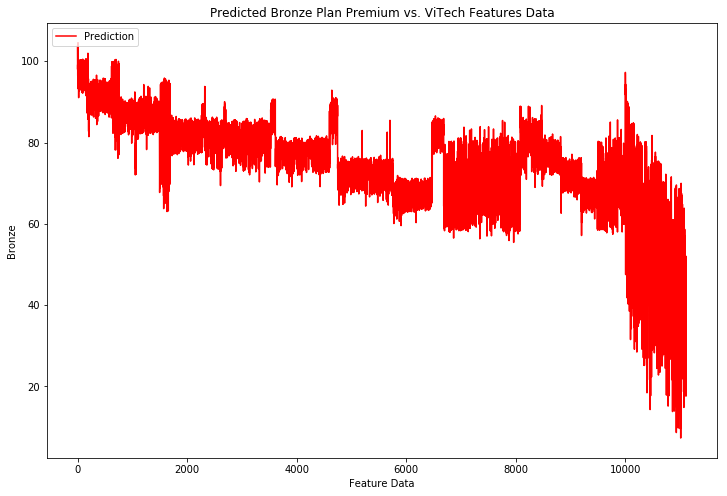

In [70]:
x = np.array(X2.iloc[:, 1])  
f = model.predict(X2).flatten()

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(f, 'r', label='Prediction')   
ax.legend(loc=2)  
ax.set_xlabel('Feature Data')  
ax.set_ylabel('Bronze')  
ax.set_title('Predicted Bronze Plan Premium vs. ViTech Features Data')  